# 212. DBSCAN - Theory and Intuition

# 213. DBSCAN versus K-Means Clustering

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [8]:
blobs

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


<Axes: xlabel='X1', ylabel='X2'>

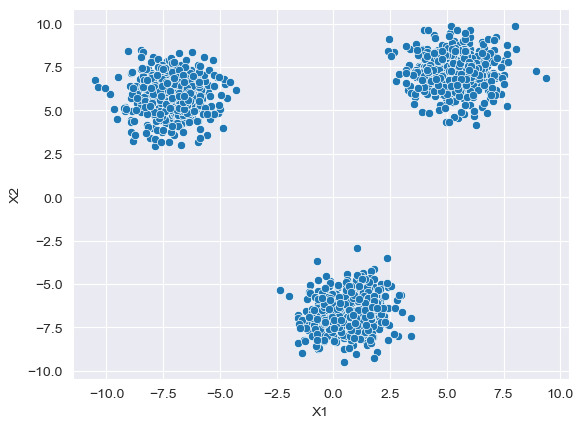

In [9]:
sns.scatterplot(data=blobs, x='X1', y='X2')

In [10]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

In [11]:
moons

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


<Axes: xlabel='X1', ylabel='X2'>

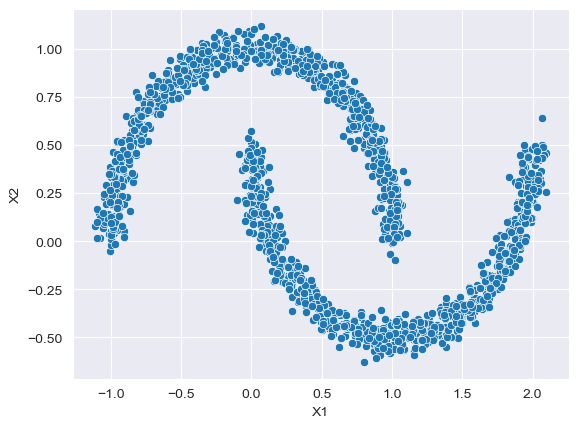

In [12]:
sns.scatterplot(data=moons, x='X1', y='X2') # Moon style Clusters

In [13]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

In [14]:
circles

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354
...,...,...
1495,-0.297506,0.077834
1496,0.082555,-0.270371
1497,0.279533,-0.109435
1498,0.027432,-0.264891


<Axes: xlabel='X1', ylabel='X2'>

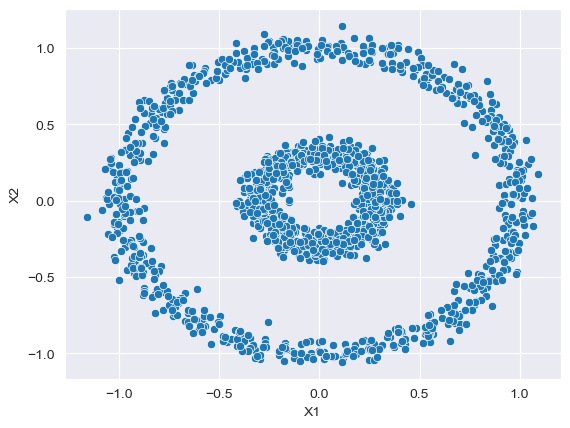

In [15]:
sns.scatterplot(data=circles, x='X1', y='X2') # Circle style Clusters

In [16]:
def display_categories(model,data):
    labels = model.fit_predict(data)
    plt.figure(figsize=(12,6))
    plt.scatter(data['X1'],data['X2'],c=labels,cmap='rainbow')

In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


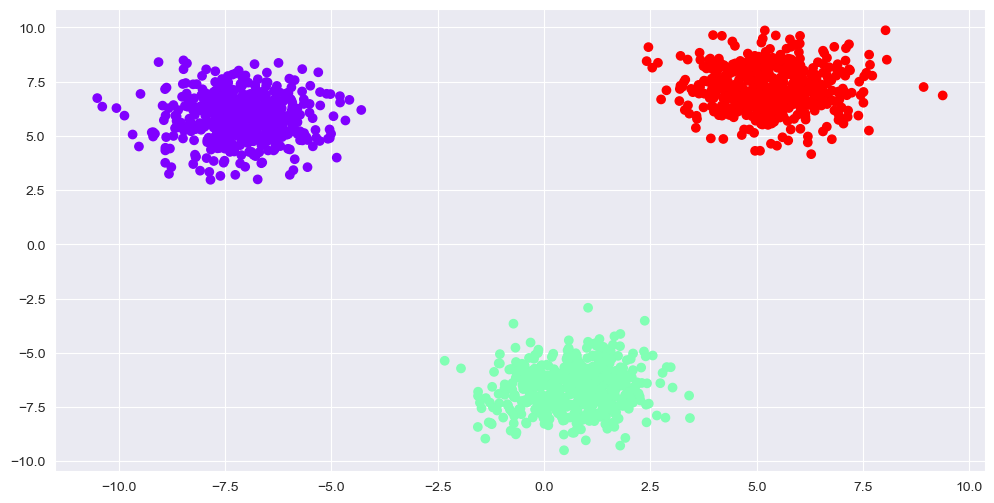

In [19]:
display_categories(model,blobs)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


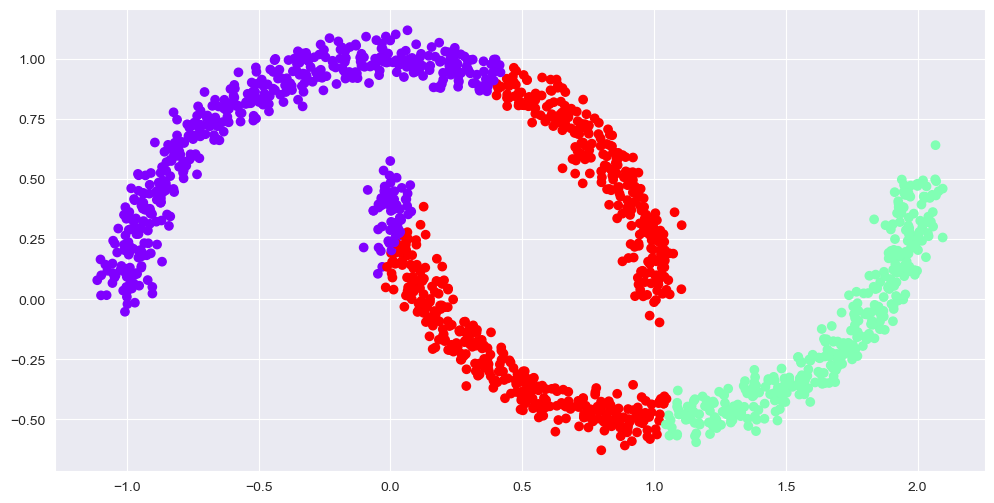

In [20]:
display_categories(model,moons)

C:\Users\Zygim\anaconda3\envs\Analytic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


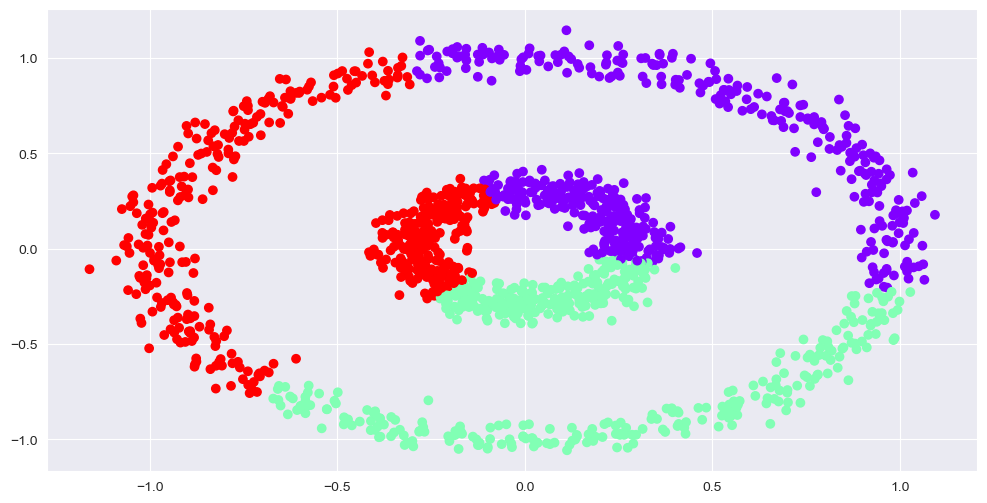

In [21]:
display_categories(model,circles)

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |
 |  This implementation has a worst case memory complexity of :math:`O({n}^2)`,
 |  which can occur when the `eps` param is large and `min_samples` is low,
 |  while the original DBSCAN only uses linear memory.
 |  For further details, see the Notes below.
 |
 |  Read more in the :ref:`User Guide <dbscan>`.
 |
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in t

In [24]:
model = DBSCAN()

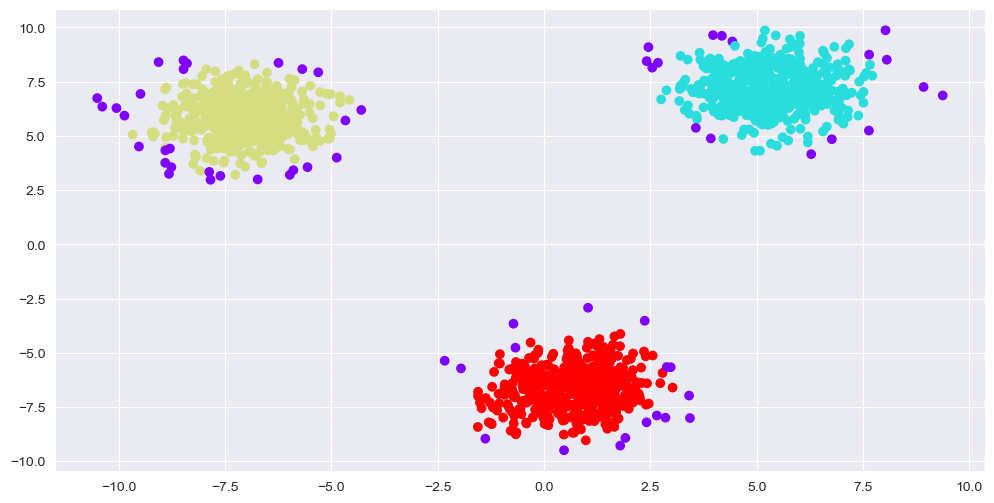

In [25]:
display_categories(model,blobs)

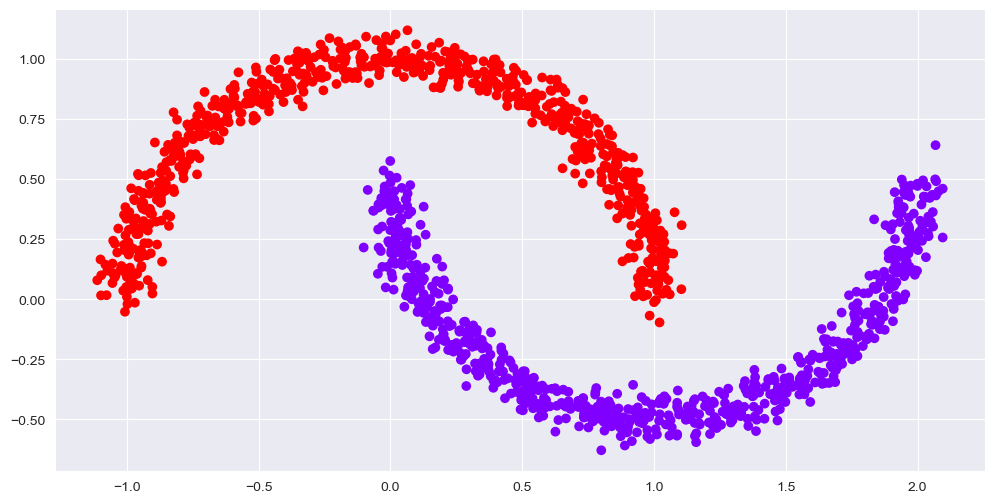

In [26]:
model = DBSCAN(eps=0.15)
display_categories(model,moons)

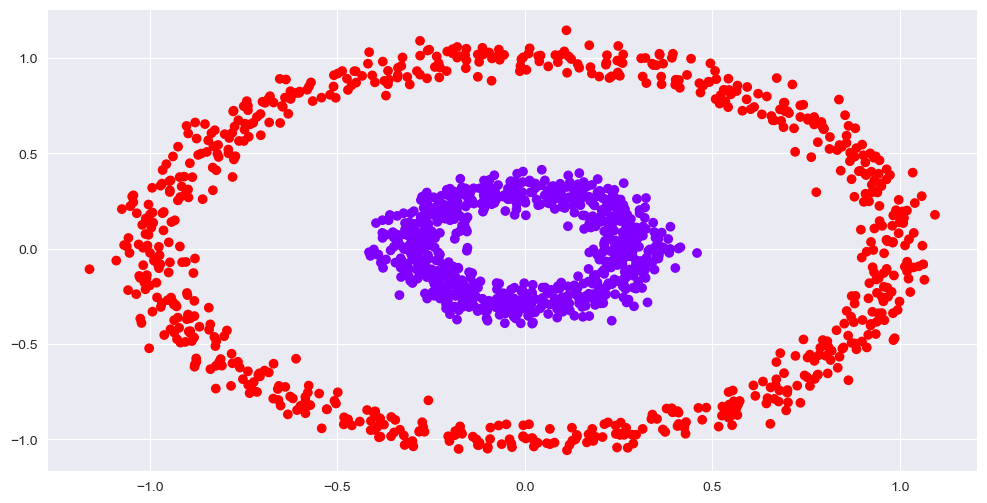

In [27]:
display_categories(model,circles)

# 214. DBSCAN - Hyperparameter Theory

# 215. DBSCAN - Hyperparameter Tuning Methods

In [28]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

In [29]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

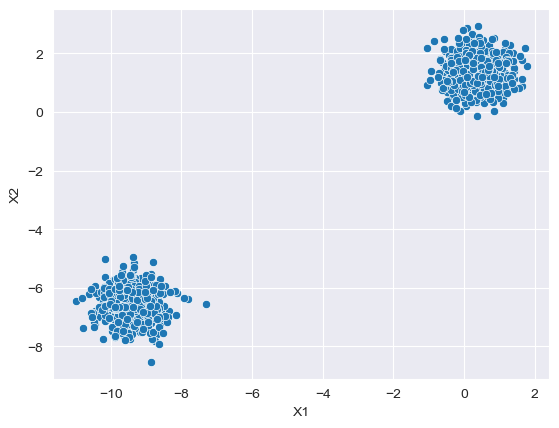

In [30]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

In [31]:
two_blobs

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
995,-9.895227,-6.644544
996,-9.544007,-6.060362
997,0.713958,1.560460
998,0.954444,0.889178


<Axes: xlabel='X1', ylabel='X2'>

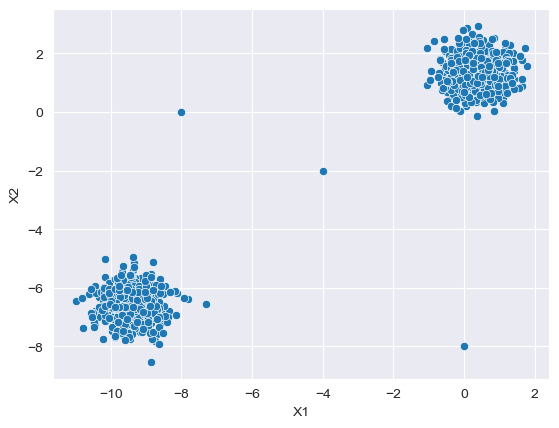

In [32]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [33]:
two_blobs_outliers

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


In [38]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    data['labels'] = labels
    sns.scatterplot(data=data, x='X1', y='X2', hue='labels', palette='Set1')
    plt.show()

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
dbscan = DBSCAN()

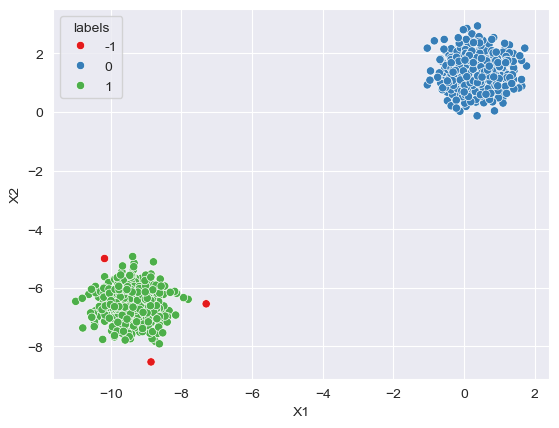

In [41]:
display_categories(dbscan, two_blobs)

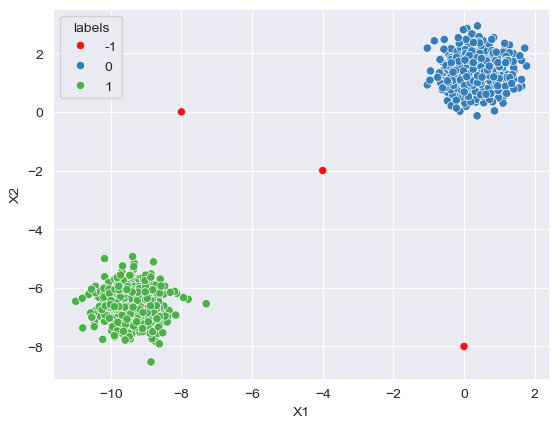

In [46]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [47]:
dbscan.labels_

array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64)

In [48]:
np.sum(dbscan.labels_ == -1)

3

In [49]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [50]:
len(dbscan.labels_)

1003

In [ ]:
outlier_percent = []

number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):

    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)